In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
file_path = r'C:\Program Files\Battery_RUL.csv'
df = pd.read_csv(file_path)

In [3]:
# Display the first few rows to understand the structure
print(df.head())

   Cycle_Index  Discharge Time (s)  Decrement 3.6-3.4V (s)  \
0          1.0             2595.30             1151.488500   
1          2.0             7408.64             1172.512500   
2          3.0             7393.76             1112.992000   
3          4.0             7385.50             1080.320667   
4          6.0            65022.75            29813.487000   

   Max. Voltage Dischar. (V)  Min. Voltage Charg. (V)  Time at 4.15V (s)  \
0                      3.670                    3.211           5460.001   
1                      4.246                    3.220           5508.992   
2                      4.249                    3.224           5508.993   
3                      4.250                    3.225           5502.016   
4                      4.290                    3.398           5480.992   

   Time constant current (s)  Charging time (s)   RUL  
0                    6755.01           10777.82  1112  
1                    6762.02           10500.35  1111  
2 

In [4]:
# Feature Columns
features = ['Cycle_Index', 'Discharge Time (s)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Charging time (s)']
# Target Column
target = 'RUL'

In [5]:
print(df.columns)

Index(['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)',
       'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)',
       'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)',
       'RUL'],
      dtype='object')


In [6]:
# Splitting the data into features (X) and target (y)
X = df[features].values
y = df[target].values

In [7]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Standardize the features (important for neural networks)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
# Define the neural network model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer with the shape of the feature space
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dropout(0.2),  # Dropout layer
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dropout(0.2),  # Dropout layer
    Dense(1)  # Output layer for regression (no activation function)
])

In [10]:
#Training with Adam optimizer

In [11]:
# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [12]:
# Train the model
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 268400.5312 - mae: 409.2783 - val_loss: 15163.3682 - val_mae: 61.2446
Epoch 2/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 10139.8105 - mae: 74.6061 - val_loss: 7961.8018 - val_mae: 27.4954
Epoch 3/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7555.9653 - mae: 61.8524 - val_loss: 5764.7622 - val_mae: 22.2992
Epoch 4/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7237.8394 - mae: 59.6097 - val_loss: 4531.4355 - val_mae: 16.9636
Epoch 5/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 6673.7222 - mae: 58.0889 - val_loss: 3380.9192 - val_mae: 13.1794
Epoch 6/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6649.8945 - mae: 57.9653 - val_loss: 3143.5586 - val_mae: 14.0127
Epoch 7/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5867.4160 - mae: 55.1937 - val_loss: 3607.3252 - val_mae: 17.7212
Epoch 8/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6081.6489 - mae: 54.8548 - val_loss: 2809.614

Epoch 52/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4257.1885 - mae: 46.7610 - val_loss: 719.9034 - val_mae: 19.1351
Epoch 53/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4115.3018 - mae: 45.4636 - val_loss: 741.5686 - val_mae: 18.3004
Epoch 54/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4326.2861 - mae: 46.4679 - val_loss: 463.8109 - val_mae: 13.6869
Epoch 55/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4263.0967 - mae: 46.3522 - val_loss: 726.8146 - val_mae: 13.4243
Epoch 56/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3983.9478 - mae: 45.2405 - val_loss: 816.6415 - val_mae: 16.3987
Epoch 57/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4062.5962 - mae: 45.4819 - val_loss: 588.0071 - val_mae: 12.3721
Epoch 58/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4172.7954 - mae: 46.1423 - val_loss: 607.1158 - val_mae: 13.8128
Epoch 59/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4145.7954 - mae: 46.0239 - val_loss: 864.6765 - v

In [13]:
# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 677.3660 - mae: 20.6786
Test Mean Absolute Error: 21.07


In [14]:
# Make predictions on the test data
y_pred = model.predict(X_test)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [15]:
# Output first few predictions and actual RUL values for comparison
for i in range(10):
    print(f'Predicted RUL: {y_pred[i][0]:.2f}, Actual RUL: {y_test[i]:.2f}')

Predicted RUL: 1016.65, Actual RUL: 1043.00
Predicted RUL: 909.03, Actual RUL: 956.00
Predicted RUL: 477.35, Actual RUL: 469.00
Predicted RUL: 208.28, Actual RUL: 176.00
Predicted RUL: 924.63, Actual RUL: 943.00
Predicted RUL: 617.84, Actual RUL: 617.00
Predicted RUL: 236.63, Actual RUL: 207.00
Predicted RUL: 79.52, Actual RUL: 32.00
Predicted RUL: 76.44, Actual RUL: 23.00
Predicted RUL: 77.93, Actual RUL: 22.00


In [16]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [17]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 761.7741715211274


In [18]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 27.600256729261186


In [19]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 21.07428883825708


In [20]:
# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9926459460659779


In [21]:
import matplotlib.pyplot as plt

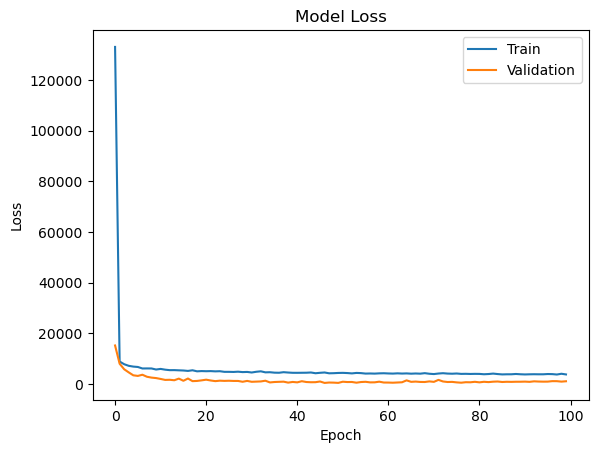

In [22]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [23]:
#Training with other Optimizers

In [24]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adamax

In [25]:
#Switching between optimizers without resetting or reinitializing the model could have caused the internal state of the model to become corrupted. This can lead to 'nan'(not a number) values during training. To avoid this, dataset is reloaded, model is redeveloped and recompiled.

In [26]:
#Reloading the Dataset
file_path = r'C:\Program Files\Battery_RUL.csv'
df = pd.read_csv(file_path)

In [27]:
X = df[features].values
y = df[target].values

In [28]:
# Standardize the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
# Define the neural network model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer with the shape of the feature space
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dropout(0.2),  # Dropout layer
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dropout(0.2),  # Dropout layer
    Dense(1)  # Output layer for regression (no activation function)
])

In [30]:
#Training with SGD

In [31]:
optimizer_sgd = SGD(learning_rate=0.001, clipvalue=1.0)

In [32]:
model.compile(optimizer=optimizer_sgd, loss='mse', metrics=['mae'])

In [33]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 291817.3125 - mae: 438.5956 - val_loss: 26720.6992 - val_mae: 60.5435
Epoch 2/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 11793.4434 - mae: 74.1732 - val_loss: 22732.4629 - val_mae: 28.3231
Epoch 3/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9381.1797 - mae: 61.2893 - val_loss: 23412.3262 - val_mae: 47.0221
Epoch 4/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 8601.8174 - mae: 59.4945 - val_loss: 25056.4844 - val_mae: 24.2464
Epoch 5/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7829.6812 - mae: 56.3106 - val_loss: 23483.3555 - val_mae: 26.6604
Epoch 6/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7973.9702 - mae: 56.7571 - val_loss: 22943.1777 - val_mae: 21.4036
Epoch 7/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8167.8096 - mae: 55.4721 - val_loss: 21255.6973 - val_mae: 37.8353
Epoch 8/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7962.6621 - mae: 55.5685 - val_loss: 21

302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 9622.1240 - mae: 50.0859 - val_loss: 16279.0938 - val_mae: 17.2460
Epoch 52/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6852.6768 - mae: 49.7209 - val_loss: 14490.7178 - val_mae: 21.1398
Epoch 53/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7106.9146 - mae: 50.1525 - val_loss: 16959.2891 - val_mae: 22.4614
Epoch 54/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8080.7524 - mae: 49.2709 - val_loss: 14611.1484 - val_mae: 14.5106
Epoch 55/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8621.6895 - mae: 49.9939 - val_loss: 14807.4961 - val_mae: 24.2526
Epoch 56/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7389.4438 - mae: 50.3356 - val_loss: 16565.7891 - val_mae: 14.8687
Epoch 57/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 8987.3809 - mae: 49.5738 - val_loss: 14589.7285 - val_mae: 19.6649
Epoch 58/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6977.3291 - mae: 50.1627 - val_loss: 16493.2070 

In [34]:
# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7574.9580 - mae: 15.3221
Test Mean Absolute Error: 16.49


In [35]:
# Make predictions on the test data
y_pred = model.predict(X_test)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [36]:
# Output first few predictions and actual RUL values for comparison
for i in range(10):
    print(f'Predicted RUL: {y_pred[i][0]:.2f}, Actual RUL: {y_test[i]:.2f}')

Predicted RUL: 1033.27, Actual RUL: 1043.00
Predicted RUL: 922.10, Actual RUL: 956.00
Predicted RUL: 463.88, Actual RUL: 469.00
Predicted RUL: 179.38, Actual RUL: 176.00
Predicted RUL: 937.65, Actual RUL: 943.00
Predicted RUL: 615.50, Actual RUL: 617.00
Predicted RUL: 218.95, Actual RUL: 207.00
Predicted RUL: 48.76, Actual RUL: 32.00
Predicted RUL: 41.37, Actual RUL: 23.00
Predicted RUL: 42.43, Actual RUL: 22.00


In [37]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 8629.162704869706


In [38]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 92.89328665124141


In [39]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 16.487200215058273


In [40]:
# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9166953536763436


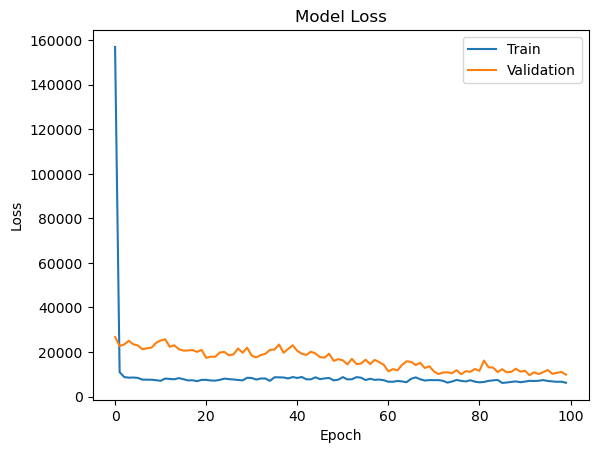

In [41]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [42]:
#Training with RMSprop

In [43]:
#Reloading the Dataset
file_path = r'C:\Program Files\Battery_RUL.csv'
df = pd.read_csv(file_path)

In [44]:
X = df[features].values
y = df[target].values

In [45]:
# Standardize the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# Define the neural network model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer with the shape of the feature space
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dropout(0.2),  # Dropout layer
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dropout(0.2),  # Dropout layer
    Dense(1)  # Output layer for regression (no activation function)
])

In [47]:
optimizer_RMS = RMSprop(learning_rate=0.001)

In [48]:
model.compile(optimizer=optimizer_RMS, loss='mse', metrics=['mae'])

In [49]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 255309.8281 - mae: 403.1986 - val_loss: 23100.7500 - val_mae: 67.6420
Epoch 2/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 12753.3447 - mae: 78.3286 - val_loss: 13707.6689 - val_mae: 27.2640
Epoch 3/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7868.6060 - mae: 61.4987 - val_loss: 11718.3877 - val_mae: 23.4951
Epoch 4/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 7452.1377 - mae: 59.9321 - val_loss: 9764.3945 - val_mae: 18.0459
Epoch 5/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6745.9917 - mae: 56.8837 - val_loss: 8462.5439 - val_mae: 24.1550
Epoch 6/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6638.4927 - mae: 56.0025 - val_loss: 9095.0166 - val_mae: 35.2992
Epoch 7/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6238.0981 - mae: 54.9076 - val_loss: 6819.8467 - val_mae: 19.5102
Epoch 8/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6621.1270 - mae: 55.8251 - val_loss: 6326.1

302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4967.8286 - mae: 50.1380 - val_loss: 864.5332 - val_mae: 21.2866
Epoch 52/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4899.0640 - mae: 49.8008 - val_loss: 452.1490 - val_mae: 12.6048
Epoch 53/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4924.3540 - mae: 49.8424 - val_loss: 379.1886 - val_mae: 9.5783
Epoch 54/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4788.7988 - mae: 48.8502 - val_loss: 349.6727 - val_mae: 11.8115
Epoch 55/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4702.1147 - mae: 48.2668 - val_loss: 379.5527 - val_mae: 8.8889
Epoch 56/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4662.8667 - mae: 48.7032 - val_loss: 470.7047 - val_mae: 14.3449
Epoch 57/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4712.0532 - mae: 48.4023 - val_loss: 322.6348 - val_mae: 8.2523
Epoch 58/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4856.5220 - mae: 49.1304 - val_loss: 453.6750 - val_mae: 14.1967


In [50]:
# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 927.1555 - mae: 23.9442
Test Mean Absolute Error: 24.58


In [51]:
# Make predictions on the test data
y_pred = model.predict(X_test)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [52]:
# Output first few predictions and actual RUL values for comparison
for i in range(10):
    print(f'Predicted RUL: {y_pred[i][0]:.2f}, Actual RUL: {y_test[i]:.2f}')

Predicted RUL: 1005.25, Actual RUL: 1043.00
Predicted RUL: 899.07, Actual RUL: 956.00
Predicted RUL: 473.26, Actual RUL: 469.00
Predicted RUL: 195.95, Actual RUL: 176.00
Predicted RUL: 914.26, Actual RUL: 943.00
Predicted RUL: 606.85, Actual RUL: 617.00
Predicted RUL: 223.12, Actual RUL: 207.00
Predicted RUL: 100.43, Actual RUL: 32.00
Predicted RUL: 95.34, Actual RUL: 23.00
Predicted RUL: 97.19, Actual RUL: 22.00


In [53]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 1009.8482849097389


In [54]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 31.778110153212996


In [55]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 24.579839160424154


In [56]:
# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9902510756730218


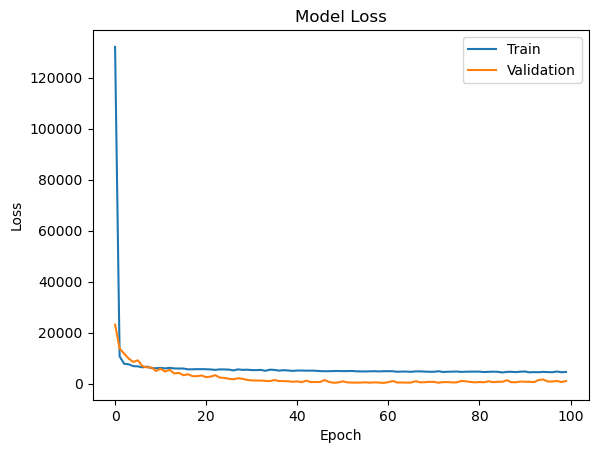

In [57]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [58]:
#Trainig with Adammax

In [59]:
#Reloading the Dataset
file_path = r'C:\Program Files\Battery_RUL.csv'
df = pd.read_csv(file_path)

In [60]:
X = df[features].values
y = df[target].values

In [61]:
# Standardize the features
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [62]:
# Define the neural network model
model = Sequential([
    Input(shape=(X_train.shape[1],)),  # Input layer with the shape of the feature space
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dropout(0.2),  # Dropout layer to prevent overfitting
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dropout(0.2),  # Dropout layer
    Dense(64, activation='relu'),  # Hidden layer with 64 neurons
    Dropout(0.2),  # Dropout layer
    Dense(1)  # Output layer for regression (no activation function)
])

In [63]:
optimizer_Adamax = Adamax(learning_rate=0.001)

In [64]:
model.compile(optimizer=optimizer_Adamax, loss='mse', metrics=['mae'])

In [65]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 389500.5312 - mae: 536.9056 - val_loss: 110927.9531 - val_mae: 281.8105
Epoch 2/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 64564.2617 - mae: 199.1330 - val_loss: 44229.6836 - val_mae: 120.4412
Epoch 3/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 27714.4688 - mae: 121.8374 - val_loss: 26282.5059 - val_mae: 83.1413
Epoch 4/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 18609.5195 - mae: 97.1892 - val_loss: 17727.2715 - val_mae: 59.0583
Epoch 5/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 14866.5127 - mae: 85.3940 - val_loss: 13310.2393 - val_mae: 42.7202
Epoch 6/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10963.1289 - mae: 75.2163 - val_loss: 10939.1885 - val_mae: 34.0579
Epoch 7/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10339.3682 - mae: 71.3923 - val_loss: 9514.4336 - val_mae: 27.5295
Epoch 8/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10047.3984 - mae: 70.6030 - va

302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 5678.4170 - mae: 53.4201 - val_loss: 1316.0940 - val_mae: 7.5345
Epoch 52/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5678.3472 - mae: 53.7164 - val_loss: 1233.3899 - val_mae: 8.4916
Epoch 53/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5432.0908 - mae: 52.3597 - val_loss: 1188.6722 - val_mae: 9.2005
Epoch 54/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5602.5762 - mae: 52.9704 - val_loss: 1185.7783 - val_mae: 8.9498
Epoch 55/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5684.4595 - mae: 53.3586 - val_loss: 1185.5090 - val_mae: 9.0374
Epoch 56/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5416.1514 - mae: 52.8620 - val_loss: 1149.6246 - val_mae: 7.2890
Epoch 57/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5508.2251 - mae: 52.8690 - val_loss: 1179.2928 - val_mae: 11.4297
Epoch 58/100
302/302 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 5336.8745 - mae: 52.0776 - val_loss: 1199.8942 - val_mae: 11.

In [66]:
# Evaluate the model on the test data
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Mean Absolute Error: {test_mae:.2f}')

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 234.7446 - mae: 11.5798
Test Mean Absolute Error: 11.91


In [67]:
# Make predictions on the test data
y_pred = model.predict(X_test)

95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [68]:
# Output first few predictions and actual RUL values for comparison
for i in range(10):
    print(f'Predicted RUL: {y_pred[i][0]:.2f}, Actual RUL: {y_test[i]:.2f}')

Predicted RUL: 1025.02, Actual RUL: 1043.00
Predicted RUL: 915.06, Actual RUL: 956.00
Predicted RUL: 469.43, Actual RUL: 469.00
Predicted RUL: 168.52, Actual RUL: 176.00
Predicted RUL: 930.88, Actual RUL: 943.00
Predicted RUL: 613.72, Actual RUL: 617.00
Predicted RUL: 210.28, Actual RUL: 207.00
Predicted RUL: 33.52, Actual RUL: 32.00
Predicted RUL: 39.30, Actual RUL: 23.00
Predicted RUL: 47.34, Actual RUL: 22.00


In [69]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error (MSE): {mse}')

Mean Squared Error (MSE): 281.3909819505183


In [70]:
# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 16.774712574304168


In [71]:
# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error (MAE): {mae}')

Mean Absolute Error (MAE): 11.911318570563376


In [72]:
# Calculate R-squared (Coefficient of Determination)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

R-squared: 0.9972834935402451


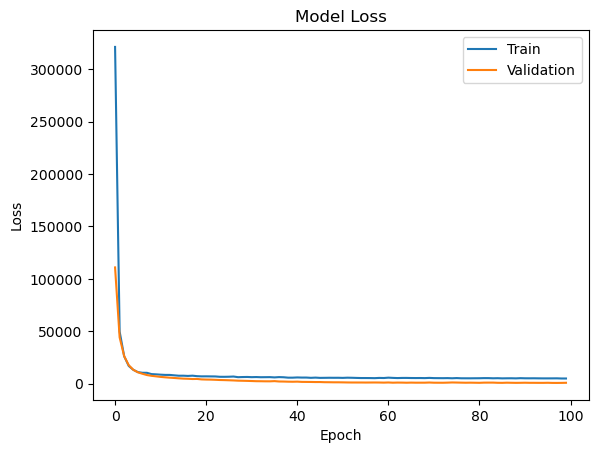

In [73]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [74]:
performance_results = {
    'Optimizer': ['Adam', 'SGD', 'RMSprop', 'Adamax'],
    'MSE': [761.7741715211274, 8629.162704869706, 1009.8482849097389, 281.3909819505183],  
    'RMSE': [27.600256729261186, 92.89328665124141, 31.778110153212996, 16.774712574304168],  
    'MAE': [21.07428883825708, 16.487200215058273, 31.778110153212996, 24.579839160424154],  
    'R-squared': [0.9926459460659779, 0.9166953536763436, 0.9902510756730218, 0.9972834935402451]  
}

In [75]:
df_performance = pd.DataFrame(performance_results)

In [76]:
df_performance_styled = df_performance.style.background_gradient(cmap='RdYlBu_r').format({
    'MSE': '{:.4f}',
    'RMSE': '{:.4f}',
    'MAE': '{:.4f}',
    'R-squared': '{:.4f}'
})

In [77]:
df_performance_styled

,Optimizer,MSE,RMSE,MAE,R-squared
0,Adam,761.7742,27.6003,21.0743,0.9926
1,SGD,8629.1627,92.8933,16.4872,0.9167
2,RMSprop,1009.8483,31.7781,31.7781,0.9903
3,Adamax,281.3910,16.7747,24.5798,0.9973


In [78]:
#Overall 'Adamax' is the best performer while 'SGD' is the worst performer